In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px


## Importing the Data Set

In [ ]:
df_job_skills=pd.read_csv("C:/Users/omika/Job-Recommender-System/job_skills.csv")

In [7]:
df_job_skills['job_link'][0]

'https://www.linkedin.com/jobs/view/housekeeper-i-pt-at-jacksonville-state-university-3802280436'

In [8]:
df_job_skills.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [9]:
df_job_skills.count()

job_link      1296381
job_skills    1294296
dtype: int64

In [10]:
df_job_postings=pd.read_csv("C:/Users/omika/Job-Recommender-System/linkedin_job_postings.csv")

In [11]:
df_job_postings.tail(20)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
1348434,https://ca.linkedin.com/jobs/view/assistant-di...,2024-01-21 07:39:59.363341+00,t,t,f,"Assistant Director, IT Modern Workplace Soluti...",BCJobs,"Victoria, British Columbia, Canada",2024-01-14,Esquimalt,Canada,Director Education,Mid senior,Onsite
1348435,https://uk.linkedin.com/jobs/view/senior-cardi...,2024-01-20 15:20:30.971126+00,t,t,f,Senior Cardiac Physiologist -Echocardiologist,KIMS Hospital,"Maidstone, England, United Kingdom",2024-01-16,Southend-on-Sea,United Kingdom,Perfusionist,Mid senior,Onsite
1348436,https://ca.linkedin.com/jobs/view/team-lead-ap...,2024-01-20 15:20:31.041227+00,t,t,f,"Team lead, Application Development",Stantec,"Winnipeg, Manitoba, Canada",2024-01-14,Manitoba,Canada,Architect,Mid senior,Onsite
1348437,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:20:47.513837+00,t,t,f,Registered Nurse - Home Care at Health Advocat...,Health eCareers,"Saco, ME",2024-01-14,Maine,United States,Nurse-Midwife,Mid senior,Onsite
1348438,https://uk.linkedin.com/jobs/view/setter-opera...,2024-01-20 15:20:47.606311+00,t,t,f,Setter Operator Team Leader / Injection Mouldi...,AWD online,"Oldham, England, United Kingdom",2024-01-15,Blackburn,United Kingdom,Alarm Operator,Mid senior,Onsite
1348439,https://www.linkedin.com/jobs/view/rn-operatin...,2024-01-20 15:20:47.92305+00,t,t,f,"RN Operating Room, Pool - Surgery Center of Ea...",SCA Health,"Easton, MD",2024-01-14,Easton,United States,Model,Mid senior,Onsite
1348440,https://www.linkedin.com/jobs/view/assistant-g...,2024-01-20 15:20:47.985101+00,t,t,f,Assistant Guest Service Manager,The Fresh Market,"Memphis, TN",2024-01-17,West Memphis,United States,Train Clerk,Mid senior,Onsite
1348441,https://www.linkedin.com/jobs/view/business-in...,2024-01-20 15:20:48.345248+00,t,t,f,Business Intake Legal Analyst,Hunton Andrews Kurth LLP,"Richmond, VA",2024-01-16,Montpelier,United States,Lead Former,Mid senior,Onsite
1348442,https://www.linkedin.com/jobs/view/after-schoo...,2024-01-20 15:20:48.670083+00,t,t,f,After School Program Manager,Guidepost Montessori,"St Louis, MO",2024-01-13,Ferguson,United States,Program Coordinator,Mid senior,Onsite
1348443,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:20:49.162243+00,t,t,f,Registered Nurse at Senior Living Properties LLC,Health eCareers,"New Braunfels, TX",2024-01-14,New Braunfels,United States,Medical Assistant,Mid senior,Onsite


In [12]:
df_job_postings.count()

job_link               1348454
last_processed_time    1348454
got_summary            1348454
got_ner                1348454
is_being_worked        1348454
job_title              1348454
company                1348443
job_location           1348435
first_seen             1348454
search_city            1348454
search_country         1348454
search_position        1348454
job_level              1348454
job_type               1348454
dtype: int64

In [ ]:
df_job_postings['job_link_cleaned'] = df_job_postings['job_link'].map(lambda x: x.split('-')[-1])
df_job_skills['job_link_cleaned'] = df_job_skills['job_link'].map(lambda x: x.split('-')[-1])

In [17]:
df_job_postings['job_link_cleaned'].duplicated().sum()

np.int64(2285)

In [18]:
duplicate_rows1=df_job_postings[df_job_postings['job_link_cleaned'].duplicated()]
duplicate_rows1

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link_cleaned
1884,https://www.linkedin.com/jobs/director-records...,2024-01-19 09:45:09.215838+00,t,f,t,Director of Records & Information Governance,Epiq,"New York, NY",2024-01-15,North Adams,United States,Director Records Management,Mid senior,Onsite,jobs
3324,https://www.linkedin.com/jobs/warm-in-worker-jobs,2024-01-19 09:45:09.215838+00,f,f,f,Outpatient Therapist _ Social Worker _ Counseling,Ridgeview Behavioral Health Services,"Oak Ridge, TN",2024-01-17,Brigham City,United States,Warm-In Worker,Mid senior,Onsite,jobs
4459,https://au.linkedin.com/jobs/mechanical-test-t...,2024-01-19 09:45:09.215838+00,t,f,t,IPS Engineering Technician (Supply Support),Babcock Australia & New Zealand,"Adelaide, South Australia, Australia",2024-01-16,Werribee,Australia,Mechanical-Test Technician,Mid senior,Onsite,jobs
4830,https://www.linkedin.com/jobs/dispatcher-servi...,2024-01-19 09:45:09.215838+00,t,f,t,Router / Dispatcher,TOI TOI USA,"Alpharetta, GA",2024-01-13,Lebanon,United States,Dispatcher Service,Associate,Onsite,jobs
4899,https://www.linkedin.com/jobs/production-helpe...,2024-01-19 09:45:09.215838+00,t,f,t,Assemblers/Machine Operators $18- $21 hour in ...,Ultimate Staffing,"Hopkinton, MA",2024-01-13,South Dakota,United States,Production Helper,Mid senior,Onsite,jobs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347339,https://www.linkedin.com/jobs/view/home-therap...,2024-01-21 07:11:26.014401+00,t,t,f,Home therapy registered nurse,Fresenius Medical Care North America,"Walnut Creek, CA",2024-01-14,Concord,United States,Supervisor Telephone Information,Mid senior,Onsite,3791764055
1347603,https://www.linkedin.com/jobs/pipe-fitter-supe...,2024-01-19 09:45:09.215838+00,f,f,f,Pipe Fitter/Welder Helper,"Independent Refrigeration Services, Inc.","York, PA",2024-01-16,Exeter,United States,Pipe-Fitter Supervisor,Associate,Onsite,jobs
1347607,https://uk.linkedin.com/jobs/view/prof-researc...,2024-01-19 12:25:49.092809+00,t,t,f,Prof & Research & Innovation Inst Director: In...,De Montfort University,"Leicester, England, United Kingdom",2024-01-16,Hastings,United Kingdom,Media Director,Mid senior,Onsite,3799335835
1347931,https://www.linkedin.com/jobs/view/floating-pe...,2024-01-21 08:20:46.600335+00,t,t,f,"Floating Personal Banking Consultant - *$1,500...",First Financial Northwest Bank,"Smokey Point, WA",2024-01-14,Arlington Heights,United States,Extra,Mid senior,Onsite,3781037141


In [19]:
#checking the job with no identifiers
x1= df_job_postings[df_job_postings['job_link_cleaned']=='jobs'] #.to_csv('duplicate_rows_filtered.csv', index=False)
x1['job_link'].iloc[-4]

'https://www.linkedin.com/jobs/tax-preparer-jobs'

In [20]:
df_job_skills['job_link_cleaned'].duplicated().sum()

np.int64(1409)

In [ ]:
df_job_skills.drop_duplicates(subset=['job_link_cleaned'], inplace=True)
df_job_postings.drop_duplicates(subset=['job_link_cleaned'], inplace=True)

In [22]:
Industry=pd.read_csv("C:/Users/omika/Job-Recommender-System/Industry.csv")

In [23]:
Industry.head()

,company,Industry
0,Jobs for Humanity,Non-profit
1,LATICRETE International,Wholesale Building Materials
2,Dice,Software Development
3,Recruiting from Scratch,Staffing and Recruiting
4,Agoda,Software Development


## Combining the Dataset

In [26]:
final_merged_df = pd.merge(df_job_skills, df_job_postings, on='job_link_cleaned', how='inner')
final_merged_df = pd.merge(final_merged_df, Industry, on='company', how='inner')

In [27]:
final_merged_df.shape

(374982, 18)

In [28]:
final_merged_df.head()

,job_link_x,job_skills,job_link_cleaned,job_link_y,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,Industry
0,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche...",3773709557,https://www.linkedin.com/jobs/view/electrical-...,2024-01-19 09:45:09.215838+00,t,t,f,Electrical Deputy Engineering Group Supervisor,Energy Jobline,"Ogden, UT",2024-01-12,Layton,United States,Cleaner,Mid senior,Onsite,Staffing and Recruiting
1,https://www.linkedin.com/jobs/view/analyst-cap...,"Debt and equity offering memorandums, Financia...",3802326007,https://www.linkedin.com/jobs/view/analyst-cap...,2024-01-19 09:45:09.215838+00,t,t,f,"Analyst, Capital Markets",JLL,"San Diego, CA",2024-01-13,San Diego,United States,Consultant Education,Associate,Onsite,Real Estate
2,https://www.linkedin.com/jobs/view/laboratory-...,"Laboratory Technician, Pharmaceutical Testing,...",3798118976,https://www.linkedin.com/jobs/view/laboratory-...,2024-01-19 09:45:09.215838+00,t,t,f,Laboratory Technician,Insight Global,"Lancaster, PA",2024-01-12,Lebanon,United States,Assembler,Associate,Onsite,Staffing and Recruiting
3,https://www.linkedin.com/jobs/view/constructio...,"Construction, General knowledge of constructio...",3791046095,https://www.linkedin.com/jobs/view/constructio...,2024-01-19 09:45:09.215838+00,t,t,f,Construction Supervisor Assistant in Rochester...,Energy Jobline,"Rochester, NY",2024-01-13,Williamson,United States,Clerk General,Mid senior,Onsite,Staffing and Recruiting
4,https://www.linkedin.com/jobs/view/internal-au...,"Accounting, Auditing, GAAP, Tax laws, Professi...",3803767644,https://www.linkedin.com/jobs/view/internal-au...,2024-01-19 09:45:09.215838+00,t,t,f,Internal Auditor,University of Utah,"Salt Lake City, UT",2024-01-12,Layton,United States,Auditor,Mid senior,Onsite,Education


In [29]:
final_merged_df.isnull().sum()

job_link_x               0
job_skills             381
job_link_cleaned         0
job_link_y               0
last_processed_time      0
got_summary              0
got_ner                  0
is_being_worked          0
job_title                0
company                  0
job_location             6
first_seen               0
search_city              0
search_country           0
search_position          0
job_level                0
job_type                 0
Industry                 0
dtype: int64

In [30]:
final_merged_df.dropna(subset=['job_skills','company','job_location','Industry'], inplace=True)

In [31]:
final_merged_df.columns

Index(['job_link_x', 'job_skills', 'job_link_cleaned', 'job_link_y',
       'last_processed_time', 'got_summary', 'got_ner', 'is_being_worked',
       'job_title', 'company', 'job_location', 'first_seen', 'search_city',
       'search_country', 'search_position', 'job_level', 'job_type',
       'Industry'],
      dtype='object')

In [32]:
final_merged_df['job_location'].nunique()

15662

In [33]:
final_merged_df['search_country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Australia'],
      dtype=object)

In [34]:
final_merged_df['search_position'].nunique()

1697

In [35]:
final_merged_df['job_type'].unique()

array(['Onsite', 'Remote', 'Hybrid'], dtype=object)

In [36]:
sample_df =final_merged_df.sample(n=int(0.2*len(final_merged_df)), random_state=42)

In [37]:
job_counts = sample_df.groupby(['search_country', 'job_title']).size().reset_index(name='count')

In [38]:
job_counts_sorted = job_counts.sort_values(by=['search_country', 'count'], ascending=False)

In [39]:
top_100_companies = final_merged_df['company'].value_counts().head(100).sort_values(ascending=False)


top_100_companies

company
Health eCareers                           39946
Jobs for Humanity                         25621
TravelNurseSource                         15997
Dollar General                            14775
PracticeLink                               9028
                                          ...  
LongHorn Steakhouse                        1058
Panera Bread                               1057
Insight Global                             1053
JE Dunn Construction                       1044
Northeast Healthcare Recruitment, Inc.     1034
Name: count, Length: 100, dtype: int64

# Cleaning and EDA to be peformed for the  df_job_postings

In [40]:
df_job_postings
df_job_postings = pd.merge(df_job_postings, Industry, on='company', how='inner')

## cleaning

In [41]:
#convenient function to clean the texts
def clean_text(input):
    # Remove special characters, brackets, and other non-letter characters
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', input)
    #remove extra spaces and tabs
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    #Remove unicode characters and Markdown
    cleaned_text = re.sub(r'[^\x00-\x7F\\]+', ' ', cleaned_text)
    # Remove numbers
    cleaned_text = re.sub(r'\d+', '', cleaned_text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    # Strip leading and trailing spaces
    cleaned_text = cleaned_text.strip()
    return cleaned_text

In [42]:
df_job_postings['cleaned_job_title'] = df_job_postings['job_title'].apply(clean_text)

In [43]:
df_job_postings['cleaned_job_title'].dropna()

0         group unit supervisor systems support manager tss
1                                   lead sales associate pt
2                                           chef de cuisine
3                              test conductor space systems
4                                              kitchen prep
                                ...                        
389892     registered nurse at senior living properties llc
389893                    registered nurse rn cp rn expplat
389894                          construction superintendent
389895                  rn registered nurse analyst expplat
389896    on demand guest advocate cashier general merch...
Name: cleaned_job_title, Length: 389897, dtype: object

In [44]:
# Nurse
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Nurse' if 'nurse' in x.lower() else x)

#Chef
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Chef' if 'chef' in x.lower() else x)

#Department Manage
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Department Manager' if 'department manager' in x.lower() else x)

#Intern
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Interns for Data Related Roles' if ('data.*intern|intern.*data' in x.lower()) and (not re.search(r'\b(manager|internal)\b', x.lower())) else x)

#Consultant

df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Consultant' if 'Data.*consultant|consultant.*Data' in x.lower() else x)


# Database managerment
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Database Management' if re.search(r'\bdatabase\binsfrastructure\b(?!.*manager)', x.lower()) else x)

# Data Engineering Manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Engineering Manager' if re.search(r'data.*Engineer.*manager|manager.*engineer.*data', x.lower()) else x)

# Data Analytics  Manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Analytics Manager' if re.search(r'Analyitcs.*manager|manager.*Analytics', x.lower()) else x)

# Data Engineer
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Engineer' if re.search(r'\bdata(?:\s+\w+)*\s+engineer\b(?!.*manager)', x.lower()) else x)

# Machine Learning Engineer
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Machine Learning Engineer' if re.search(r'\bmachine\s+learning\s+engineer\b', x.lower()) else x)

# Data Science Manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Science Manager' if re.search(r'\bdata\s+science\s+manager\b|\bmanager\s+data\s+science\b', x.lower()) else x)

# Data Scientist
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Scientist' if re.search(r'\bdata\s+scientist\b(?!.*manager)', x.lower()) else x)


# Data Analyst or Data Analytics
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Analyst' if re.search(r'\bdata\s+analyst\b|\bdata\s+analytics\b\bintelligence\b.*\bdata\b\bdata\b.*\bintelligence\b(?!.*manager)', x.lower()) else x)

# Business Analyst
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Business Analyst' if re.search(r'\banalyst\b.*\bbusiness\b|\bbusiness\b.*\banalyst\b|\bbusiness\s+analytics\b|\banalytics\b.*\bbusiness\b|\bbusiness\b.*\banalytics\b|\banalyst\b.*\banalytics\b|\banalytics\b.*\banalyst\b', x.lower()) and not re.search(r'\bmanager\b', x.lower()) else x)

#Statitician
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Statistician' if 'statistician' in x.lower() else x)

# Sales Associate
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Sales Associate' if re.search(r'\b(sales\s*associate|associate\s*sales)\b', x.lower()) else x)

# Customer Service
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Customer Service' if re.search(r'\b(customer\s*service|service\s*customer)\b', x.lower()) else x)

# Store Manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Store Manager' if re.search(r'\b(store\s*manager|manager\s*store)\b', x.lower()) else x)

# Tax Professional
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Tax Professional' if re.search(r'\b(tax\s*professional|professional\s*tax)\b', x.lower()) else x)

# Beauty Advisor
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Beauty Advisor' if re.search(r'\b(beauty\s*advisor|advisor\s*beauty)\b', x.lower()) else x)

# Sales Lead
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Sales Lead' if re.search(r'\b(sales\s*lead|lead\s*sales)\b', x.lower()) else x)

# Tax Manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Tax Manager' if re.search(r'\b(tax\s*manager|manager\s*tax)\b', x.lower()) else x)

# Supervisor
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Supervisor' if 'supervisor' in x.lower() else x)

# Accountant
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Accountant' if 'accountant' in x.lower() else x)

# Audit Associate
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Audit Associate' if re.search(r'\baudit\b', x.lower()) and not re.search(r'\bmanager\b', x.lower()) else x)

# Tax Associate
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Tax Associate' if re.search(r'\b(tax\s*associate|associate\s*tax)\b', x.lower()) and not re.search(r'\bmanager\b', x.lower()) else x)

#  'counselor'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Counselor' if re.search(r'\bcounselor\b', x.lower()) else x)

# 'quality manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Quality Manager' if re.search(r'\bquality\s*manager\b', x.lower()) else x)

# 'operations manager'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Operations Manager' if re.search(r'\boperations\s*manager\b', x.lower()) else x)

# 'family therapist'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Family Therapist' if re.search(r'\bfamily\s*therapist\b', x.lower()) else x)

#  'Intensive care'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Intensive Care' if re.search(r'\bintensive\s*care\b', x.lower()) else x)

#  'conductor'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Conductor' if re.search(r'\bconductor\b', x.lower()) else x)

# A'physician'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Physician' if re.search(r'\bphysician\b', x.lower()) else x)

# 'travel management'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Travel Management' if re.search(r'\btravel\s*management\b', x.lower()) else x)

In [45]:
# drop irrelvent columns
columns_to_drop = ['got_summary', 'search_city', 'search_position', 'job_link', 'job_title','got_ner']
df_job_postings_EDA = df_job_postings.drop(columns=columns_to_drop)


In [46]:
df_job_postings_EDA.columns

Index(['last_processed_time', 'is_being_worked', 'company', 'job_location',
       'first_seen', 'search_country', 'job_level', 'job_type',
       'job_link_cleaned', 'Industry', 'cleaned_job_title'],
      dtype='object')

In [47]:
new_column_names = {
    'last_processed_time': 'Last Prcoessed Time',
    'is_being_worked': 'Active Jobs',
    'company': 'Company',
    'job_location': 'Job Location',
    'first_seen': 'Job Release Date ',
    'search_country': 'Country',
    'job_level': 'Job Level',
    'job_type': 'Job Type ',
    'job_link_cleaned': 'Job Link',
    'cleaned_job_title': 'Job Title',
    'Industry_y': 'Industry'
}

df_job_postings_EDA = df_job_postings_EDA.rename(columns=new_column_names)


In [48]:
df_job_postings_EDA.columns


Index(['Last Prcoessed Time', 'Active Jobs', 'Company', 'Job Location',
       'Job Release Date ', 'Country', 'Job Level', 'Job Type ', 'Job Link',
       'Industry', 'Job Title'],
      dtype='object')

## attempt to fetch the country from city name

In [49]:
# pip install geocoder


In [50]:
# from geopy.geocoders import Nominatim

# def read_country(city):
#     """
#     Convert cities and returns the country
#     """
#     geolocator = Nominatim(user_agent="google")
#     location = geolocator.geocode(city, language="en")

#     if location is None:
#         return None

#     country = location.address.split(',')[-1].strip()  # added strip() to remove leading/trailing whitespaces
#     return country

In [51]:
# read_country("Norton Shores, MI")

## attempt to fetch industry from the company name

In [52]:
# import requests

# def fetch_company_industry(company_name):
#     url = f"https://api.opencorporates.com/v0.4/companies/search?q={company_name}&order=score"

#     response = requests.get(url)

#     if response.status_code == 200:
#         data = response.json()
#         if data['results']['total_count'] > 0:
#             industry = data['results']['companies'][0]['industry_codes'][0]['description']
#             return industry
#         else:
#             return "Industry information not found"
#     else:
#         return "Error: {}".format(response.status_code)

# company_name = "Google"

# industry = fetch_company_industry(company_name)
# print("Industry of {}: {}".format(company_name, industry))


In [53]:
# filtered_df.to_csv('/content/drive/MyDrive/NUS MSBA/CS5344/Group Project/data.csv', index=False)


##EDA

### Most in-demand job


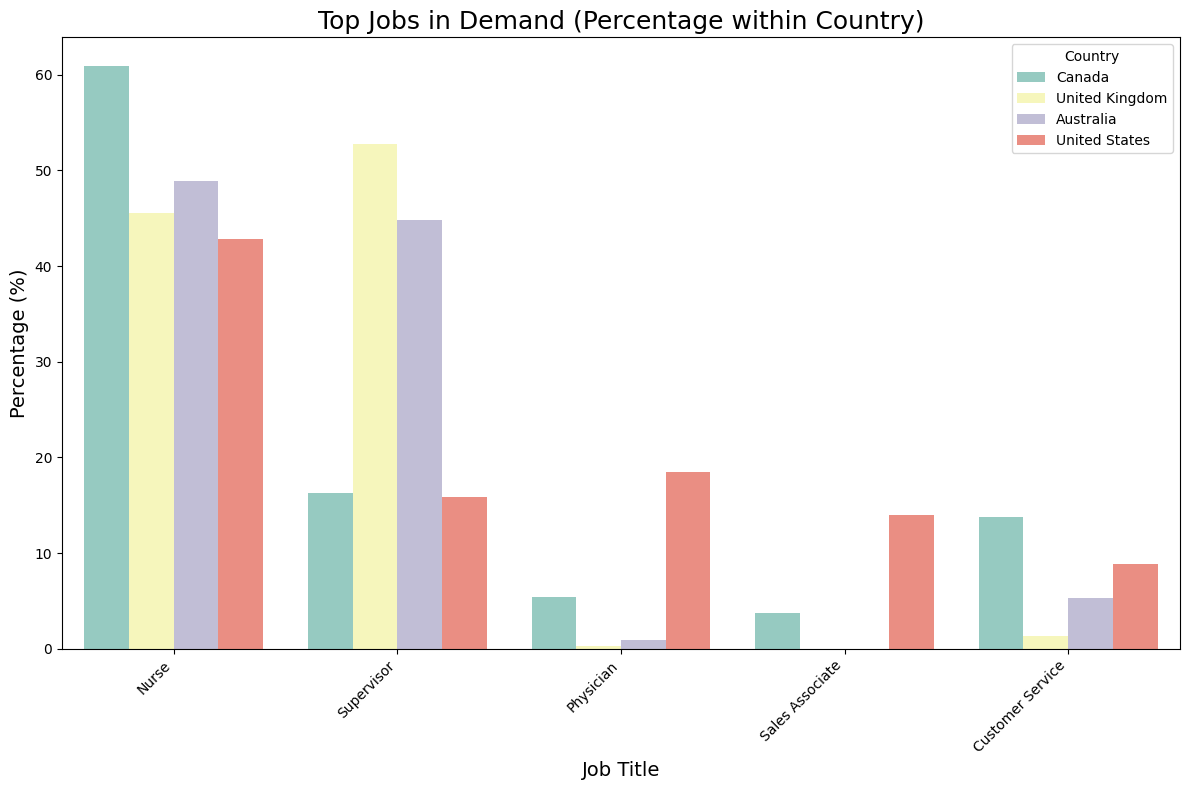

In [ ]:
# Calculate the Top 5 Job Titles overall
Top_10_jobs = df_job_postings_EDA['Job Title'].value_counts().head(5).index

# Filter the data to include only the Top 5 jobs
filtered_data = df_job_postings_EDA[df_job_postings_EDA['Job Title'].isin(Top_10_jobs)].copy()

# Calculate the count for each Job Title within each Country
Job_title_count = filtered_data.groupby(['Country', 'Job Title']).size().reset_index(name='count')

# Calculate the total number of jobs for each Country
Country_total = Job_title_count.groupby('Country')['count'].sum().reset_index(name='Country_Total')

# Merge the total back into the job count table
Job_title_count = Job_title_count.merge(Country_total, on='Country')

# Calculate the percentage of each job title within its country
Job_title_count['percentage'] = (Job_title_count['count'] / Job_title_count['Country_Total']) * 100

# Sort the results by percentage
Job_tite_count_sorted = Job_title_count.sort_values(by='percentage', ascending=False)

# Plotting the percentage 
plt.figure(figsize=(12, 8))

sns.barplot(
    data=Job_tite_count_sorted,
    x='Job Title',
    y='percentage', # Use percentage instead of count
    hue='Country',
    palette='Set3'
)

plt.title('Top Jobs in Demand (Percentage within Country)', fontsize=18)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

### most in-demand job break down by country


In [55]:
# Group by country and cleaned job title, count occurrences, and sort
grouped_data = df_job_postings_EDA.groupby(['Country', 'Job Title']).size().reset_index(name='count')
grouped_data_sorted = grouped_data.groupby('Country').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

C:\Users\omika\AppData\Local\Temp\ipykernel_14536\719178507.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data_sorted = grouped_data.groupby('Country').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


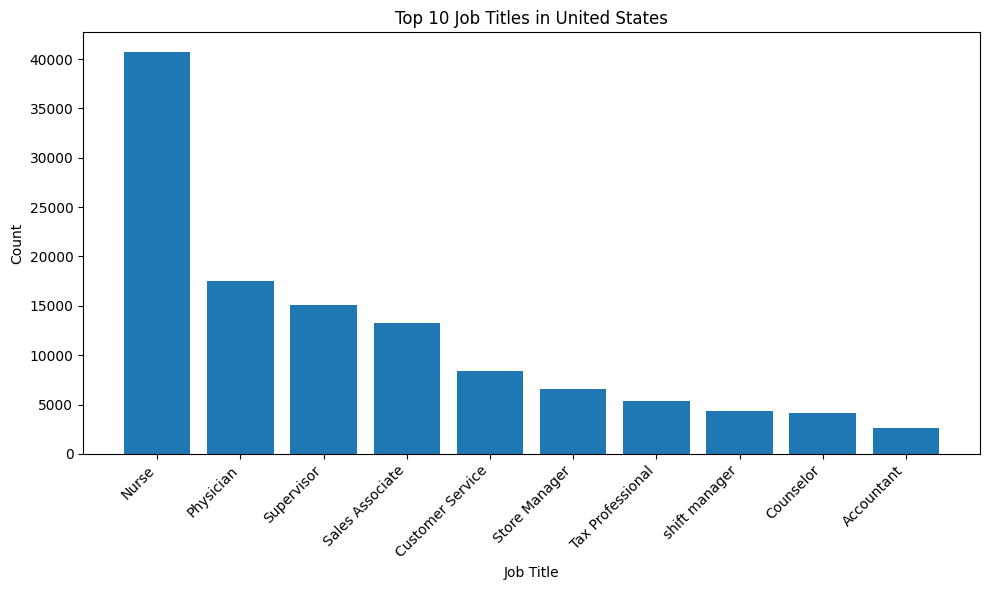

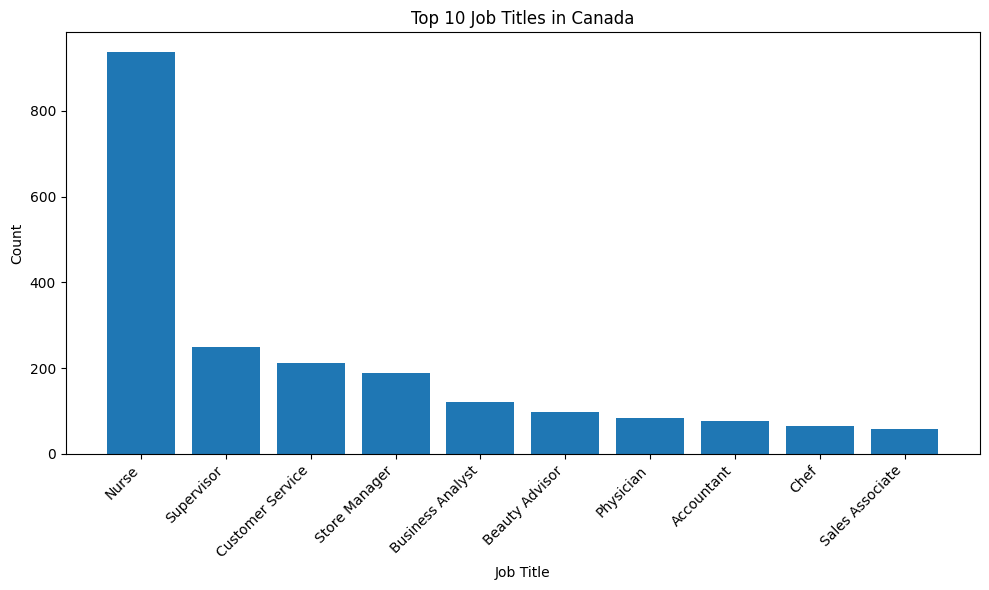

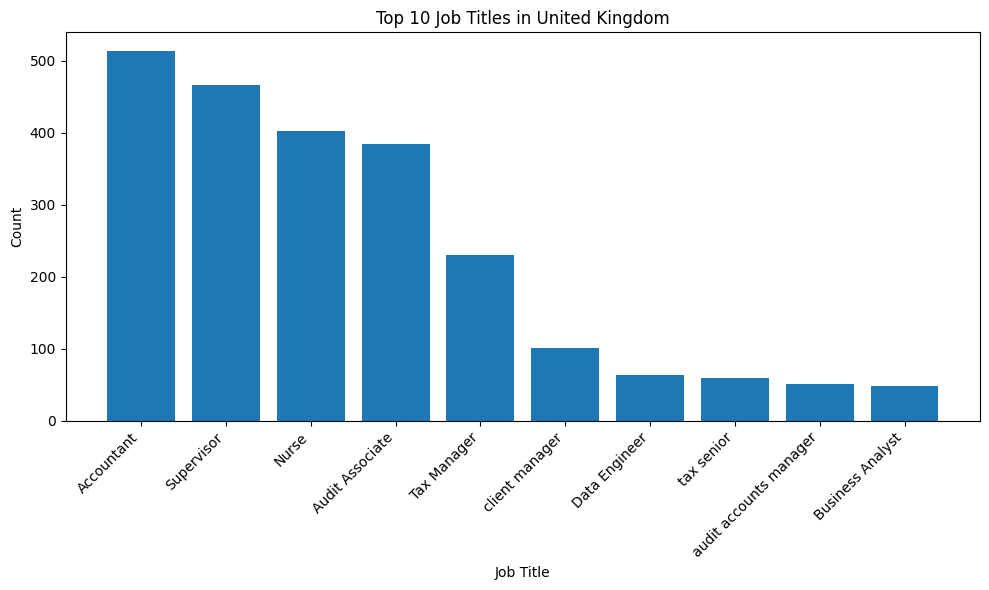

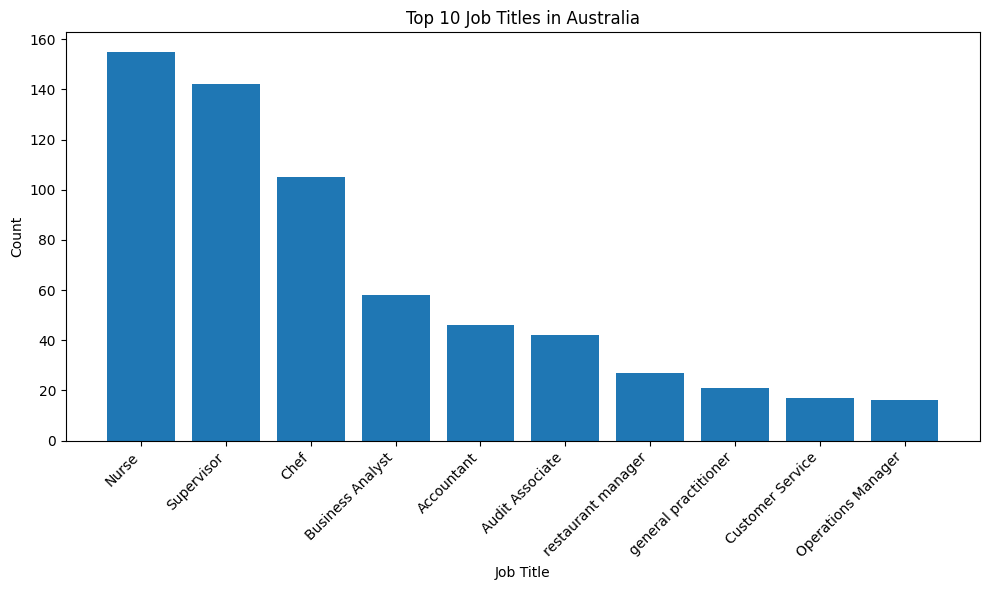

In [56]:
# Plot separate bar charts for each country
countries = df_job_postings_EDA['Country'].unique()
for country in countries:
    data_country = grouped_data_sorted[grouped_data_sorted['Country'] == country]
    plt.figure(figsize=(10, 6))
    plt.bar(data_country['Job Title'], data_country['count'])
    plt.title(f'Top 10 Job Titles in {country}')
    plt.xlabel('Job Title')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### most in-demand job  break down by city 

In [57]:
# Find the top 5 most Job_Location
Job_Location = df_job_postings_EDA['Job Location'].value_counts().head(5).index

# Filter the dataframe to include only the top 10 jobs
filtered_data = df_job_postings_EDA[df_job_postings_EDA['Job Location'].isin(Job_Location)]

In [58]:
# Group by location and cleaned job title, count occurrences, and sort
grouped_data = filtered_data.groupby(['Job Location', 'Job Title']).size().reset_index(name='count')
grouped_data_sorted = grouped_data.groupby('Job Location').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

C:\Users\omika\AppData\Local\Temp\ipykernel_14536\124575010.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data_sorted = grouped_data.groupby('Job Location').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


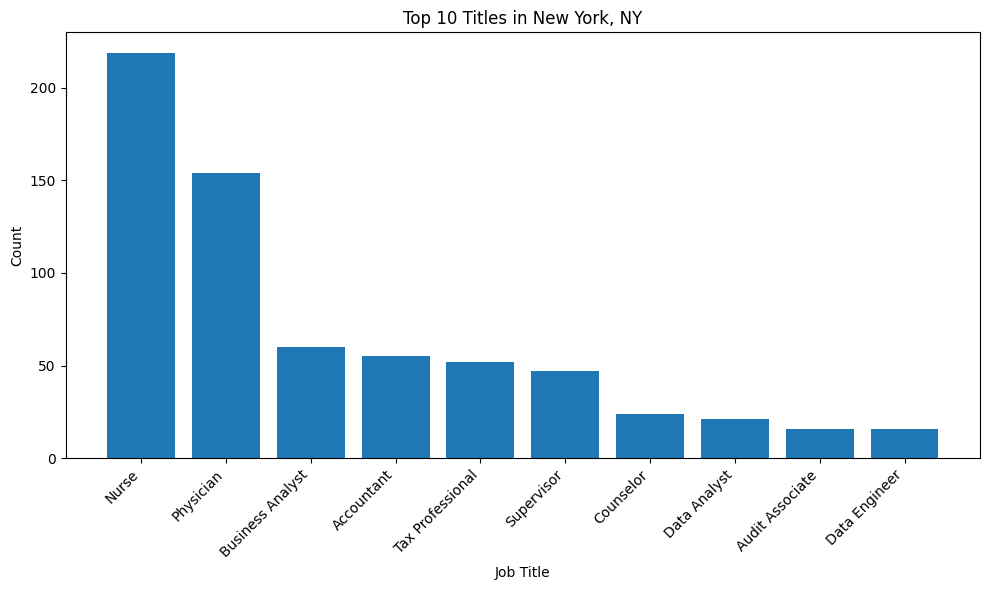

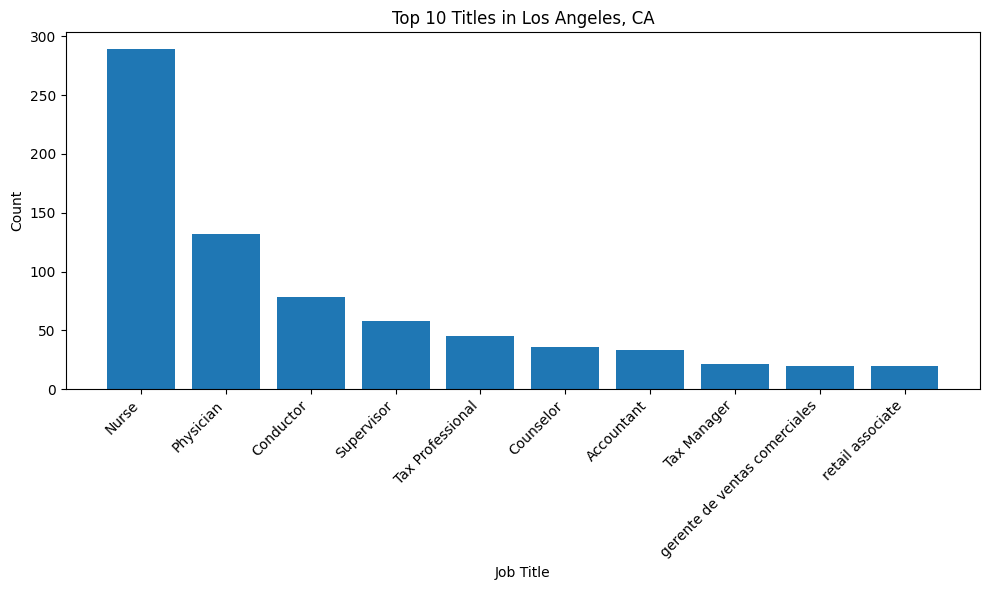

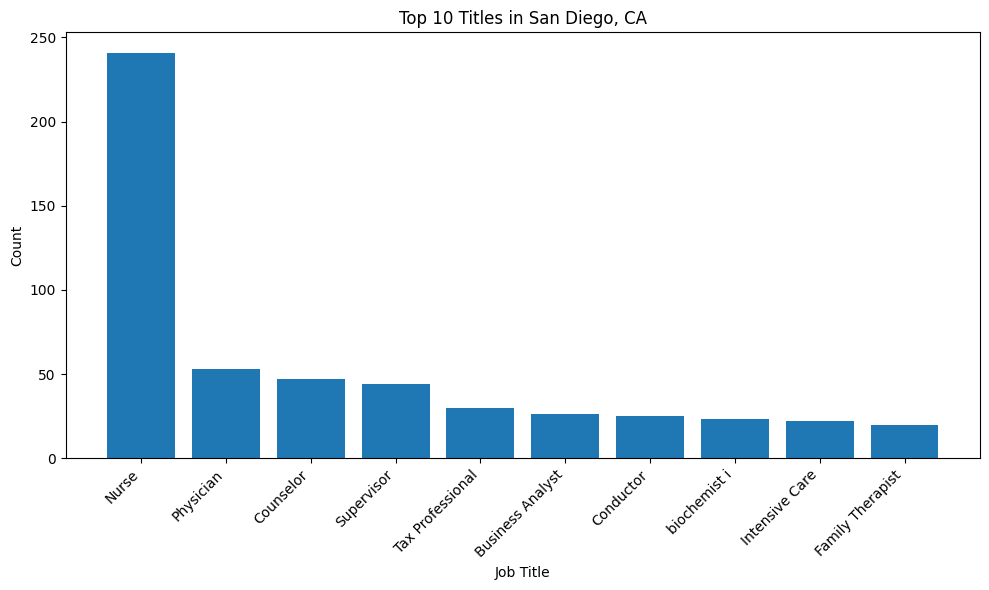

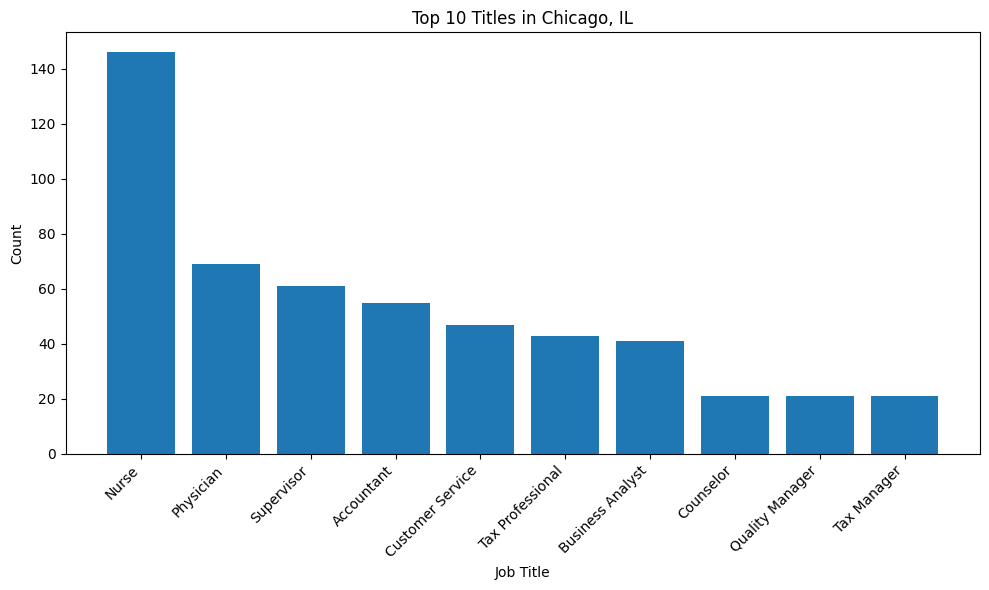

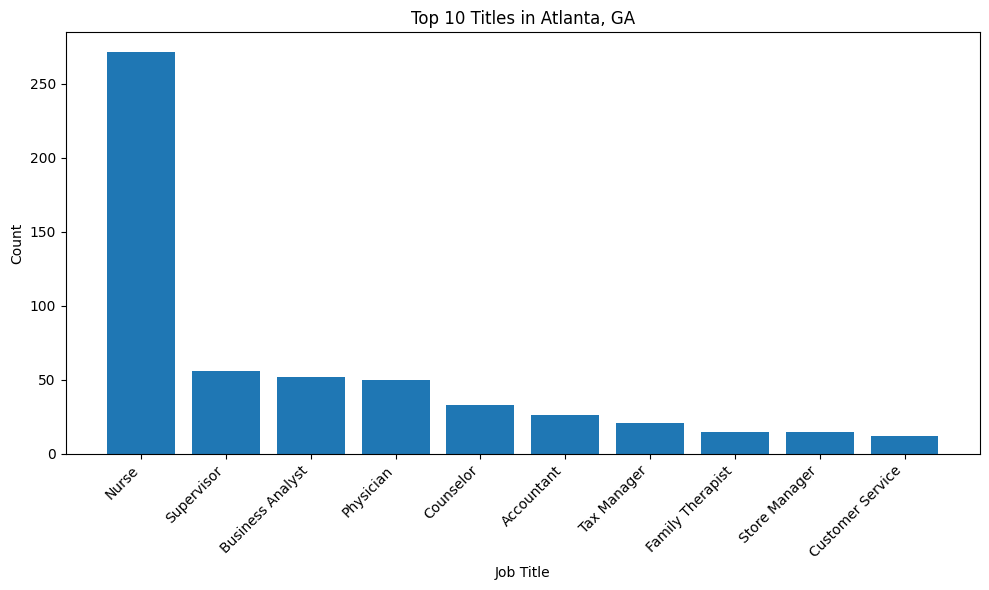

In [59]:
# Plot separate bar charts for each country
Location = Job_Location
for Location in Location:
    data_country = grouped_data_sorted[grouped_data_sorted['Job Location'] == Location]
    plt.figure(figsize=(10, 6))
    plt.bar(data_country['Job Title'], data_country['count'])
    plt.title(f'Top 10 Titles in {Location}')
    plt.xlabel('Job Title')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [60]:
df_job_postings_EDA

,Last Prcoessed Time,Active Jobs,Company,Job Location,Job Release Date,Country,Job Level,Job Type,Job Link,Industry,Job Title
0,2024-01-19 09:45:09.215838+00,f,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,United States,Mid senior,Onsite,3803057508,Healthcare,Supervisor
1,2024-01-21 08:08:25.628853+00,f,Dollar General,"Tipton, IN",2024-01-14,United States,Mid senior,Onsite,3580065885,Retail,Sales Associate
2,2024-01-21 07:12:35.170823+00,f,Goodwin Recruiting,"Brookfield, WI",2024-01-14,United States,Mid senior,Onsite,3805761853,Staffing and Recruiting,Chef
3,2024-01-21 06:01:19.472942+00,f,Northrop Grumman,"Gilbert, AZ",2024-01-15,United States,Mid senior,Onsite,3795910227,Defense and Space Manufacturing,Conductor
4,2024-01-21 06:01:14.503312+00,f,"Bob Evans Restaurants, LLC","Westminster, MD",2024-01-14,United States,Associate,Onsite,3803187020,Restaurants,kitchen prep
...,...,...,...,...,...,...,...,...,...,...,...
389892,2024-01-20 15:20:49.162243+00,f,Health eCareers,"New Braunfels, TX",2024-01-14,United States,Mid senior,Onsite,3796403087,Staffing and Recruiting,Nurse
389893,2024-01-20 15:21:07.786118+00,f,TravelNurseSource,"Providence, RI",2024-01-14,United States,Mid senior,Onsite,3798038316,Healthcare,Nurse
389894,2024-01-20 15:21:10.885264+00,f,Jobot,"New Iberia, LA",2024-01-15,United States,Mid senior,Onsite,3805151489,Staffing and Recruiting,construction superintendent
389895,2024-01-21 00:38:39.816821+00,f,TravelNurseSource,"Aurora, CO",2024-01-16,United States,Mid senior,Onsite,3802207476,Healthcare,Nurse


### Key Industries with High Job Demand



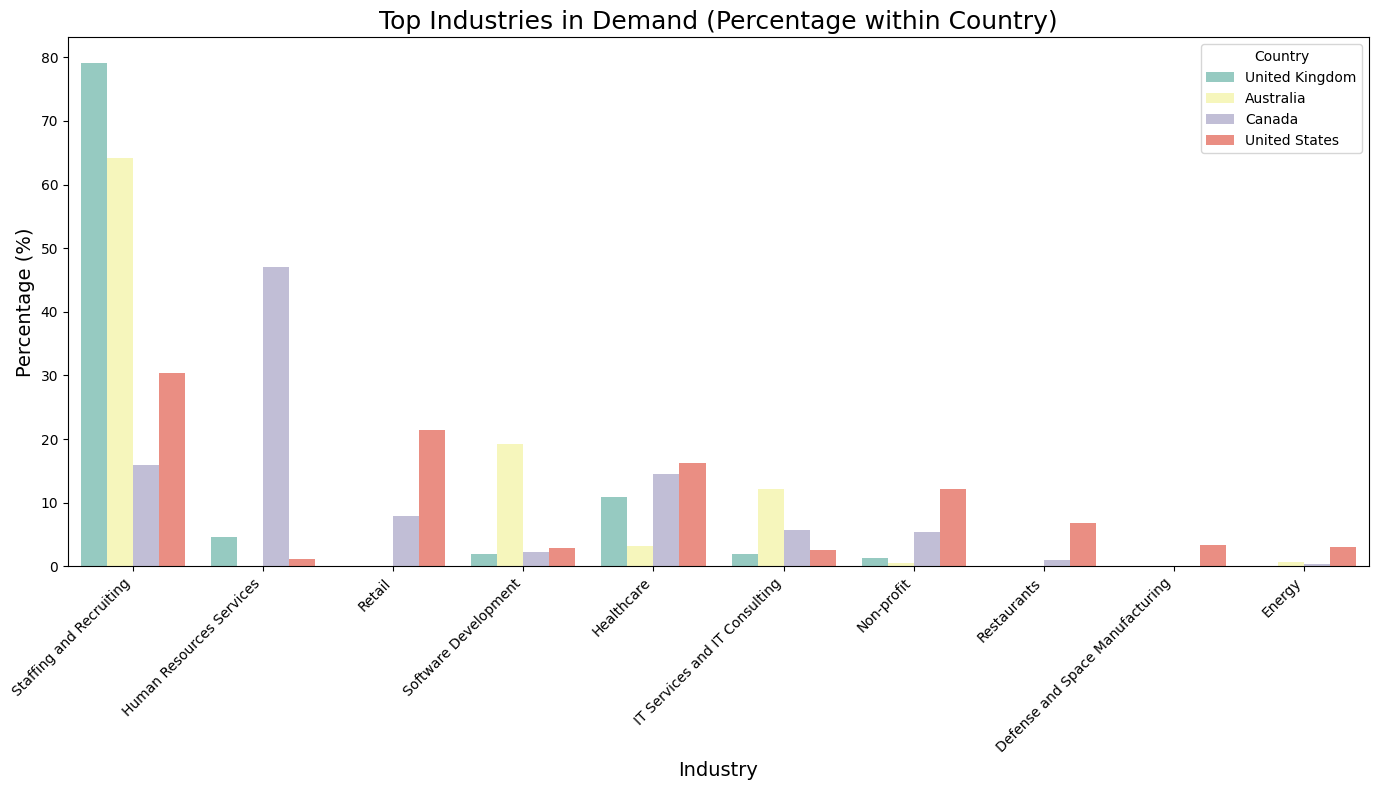

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Find the top 10 most in-demand industries (based on overall count)
Top_10_Industry = df_job_postings_EDA['Industry'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 industries
filtered_data = df_job_postings_EDA[df_job_postings_EDA['Industry'].isin(Top_10_Industry)].copy()

# Group and count industry occurrences by country
industry_counts_by_country = filtered_data.groupby(['Country', 'Industry']).size().reset_index(name='count')

# Calculate the total number of jobs for each Country
Country_total = filtered_data.groupby('Country').size().reset_index(name='Country_Total')

# Merge the total back into the industry count table
industry_counts_by_country = industry_counts_by_country.merge(Country_total, on='Country')

# Calculate the percentage of each industry within its country
industry_counts_by_country['percentage'] = (
    industry_counts_by_country['count'] / industry_counts_by_country['Country_Total']
) * 100

# Sort the results by percentage
industry_counts_by_country_sorted_pct = industry_counts_by_country.sort_values(
    by='percentage', ascending=False
)
# Plotting the Normalized Data

plt.figure(figsize=(14, 8))

sns.barplot(
    data=industry_counts_by_country_sorted_pct,
    x='Industry',
    y='percentage', # Plotting percentage for meaningful comparison
    hue='Country',
    palette='Set3'
)

plt.title('Top Industries in Demand (Percentage within Country)', fontsize=18)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()
plt.show() 

### Top jobs offered by the key industries

In [62]:
Top_5_Jobs = df_job_postings_EDA['Job Title'].value_counts().head(5).index

# Filter the dataframe to include only the top 5 jobs
filtered_data = df_job_postings_EDA[df_job_postings_EDA['Job Title'].isin(Top_5_Jobs)]

# Filter the dataframe to include only the top 10 industries
filtered_data = filtered_data[filtered_data['Industry'].isin(Top_10_Industry)]

industry_counts_by_jobs = filtered_data.groupby(['Job Title', 'Industry']).size().reset_index(name='count')

industry_counts_by_country_sorted = industry_counts_by_jobs.sort_values(by='count', ascending=False)

fig = px.bar(industry_counts_by_country_sorted, x='Job Title', y='count', color='Industry',
             labels={'Job Title': 'Job Title', 'count': 'Count', 'Industry': 'Industry'},
             title='Top Jobs Offered by Key Industries',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(xaxis_tickangle=-45,
                  xaxis={'categoryorder': 'total descending'})

fig.show()

In [63]:
df_job_postings_EDA

,Last Prcoessed Time,Active Jobs,Company,Job Location,Job Release Date,Country,Job Level,Job Type,Job Link,Industry,Job Title
0,2024-01-19 09:45:09.215838+00,f,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,United States,Mid senior,Onsite,3803057508,Healthcare,Supervisor
1,2024-01-21 08:08:25.628853+00,f,Dollar General,"Tipton, IN",2024-01-14,United States,Mid senior,Onsite,3580065885,Retail,Sales Associate
2,2024-01-21 07:12:35.170823+00,f,Goodwin Recruiting,"Brookfield, WI",2024-01-14,United States,Mid senior,Onsite,3805761853,Staffing and Recruiting,Chef
3,2024-01-21 06:01:19.472942+00,f,Northrop Grumman,"Gilbert, AZ",2024-01-15,United States,Mid senior,Onsite,3795910227,Defense and Space Manufacturing,Conductor
4,2024-01-21 06:01:14.503312+00,f,"Bob Evans Restaurants, LLC","Westminster, MD",2024-01-14,United States,Associate,Onsite,3803187020,Restaurants,kitchen prep
...,...,...,...,...,...,...,...,...,...,...,...
389892,2024-01-20 15:20:49.162243+00,f,Health eCareers,"New Braunfels, TX",2024-01-14,United States,Mid senior,Onsite,3796403087,Staffing and Recruiting,Nurse
389893,2024-01-20 15:21:07.786118+00,f,TravelNurseSource,"Providence, RI",2024-01-14,United States,Mid senior,Onsite,3798038316,Healthcare,Nurse
389894,2024-01-20 15:21:10.885264+00,f,Jobot,"New Iberia, LA",2024-01-15,United States,Mid senior,Onsite,3805151489,Staffing and Recruiting,construction superintendent
389895,2024-01-21 00:38:39.816821+00,f,TravelNurseSource,"Aurora, CO",2024-01-16,United States,Mid senior,Onsite,3802207476,Healthcare,Nurse


### Top Companies actively hiring

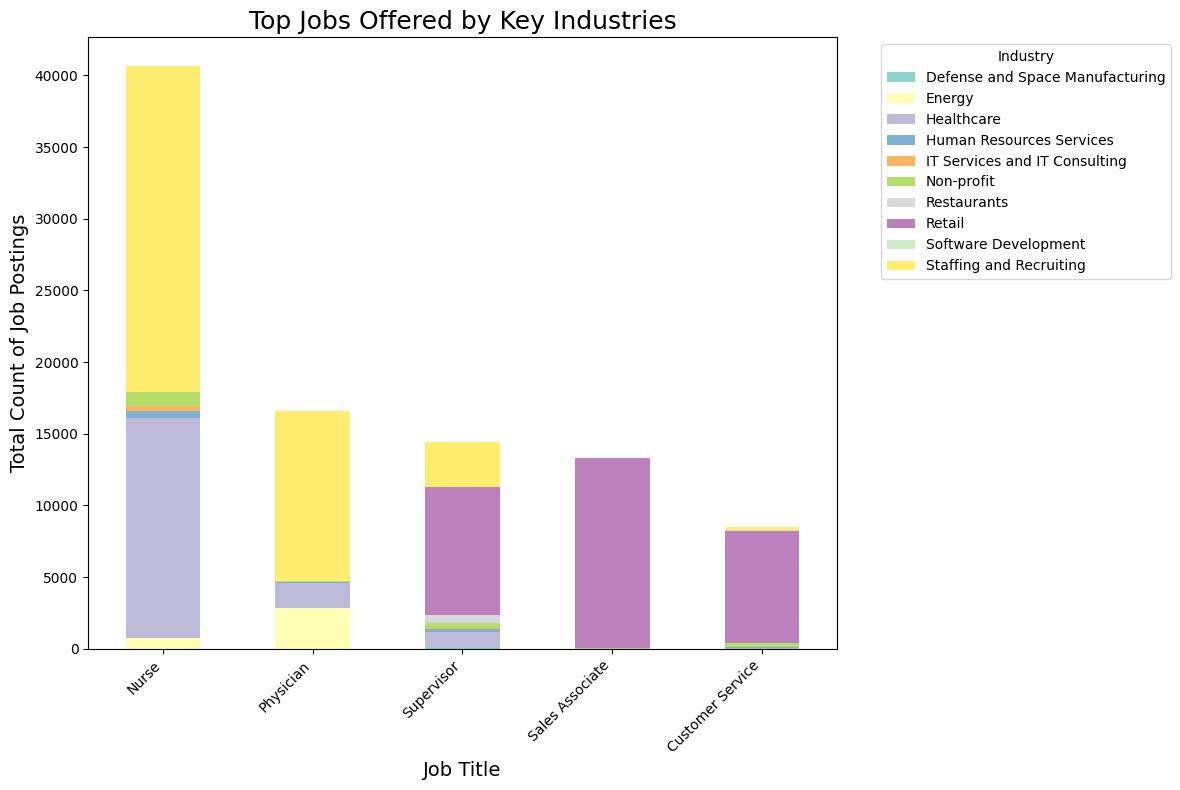

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Aggregation and Filtering (Your original logic) ---

# Find the top 5 most in-demand jobs
Top_5_Jobs = df_job_postings_EDA['Job Title'].value_counts().head(5).index

# Filter the dataframe to include only the top 5 jobs
filtered_data = df_job_postings_EDA[df_job_postings_EDA['Job Title'].isin(Top_5_Jobs)].copy()

# Filter the dataframe to include only the top 10 industries (assuming Top_10_Industry is defined)
# If Top_10_Industry is not defined, you'll need to define it:
# Top_10_Industry = df_job_postings_EDA['Industry'].value_counts().head(10).index
filtered_data = filtered_data[filtered_data['Industry'].isin(Top_10_Industry)]

# Group and count
industry_counts_by_jobs = filtered_data.groupby(['Job Title', 'Industry']).size().reset_index(name='count')


# --- Plotting the Stacked Bar Chart (Matplotlib/Seaborn) ---

# 1. Pivot the data: Job Titles become rows, Industries become columns, counts fill the values.
plot_data = industry_counts_by_jobs.pivot(index='Job Title', columns='Industry', values='count').fillna(0)

# 2. Get the Job Titles sorted by their total count (to order the x-axis)
job_total_counts = industry_counts_by_jobs.groupby('Job Title')['count'].sum().sort_values(ascending=False).index
plot_data = plot_data.loc[job_total_counts]

# 3. Create the plot
plt.figure(figsize=(12, 8))
plot_data.plot(kind='bar', stacked=True, colormap='Set3', ax=plt.gca())

# 4. Final Touches
plt.title('Top Jobs Offered by Key Industries', fontsize=18)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Total Count of Job Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analysis of the Data related jobs

In [ ]:
filtered_df = df_job_postings[df_job_postings['cleaned_job_title'].str.contains('Data.*Engineer|Engineer.*Data', case=False, regex=True)]
Data_jobs = df_job_postings_EDA[df_job_postings_EDA['Job Title'].str.contains('Data|statistician|business.*analyst|analyst.*business|machine.*Learning|Learning.*machine|Analytics|intelligence', case=False, regex=True)]


In [ ]:
Data_jobs.shape

In [ ]:
Data_jobs.head()

In [ ]:

#Intern
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Interns for Data Related Roles' if ('intern' in x.lower()) and (not re.search(r'\b(manager|internal)\b', x.lower())) else x)

# Consultant
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Consultant' if 'consultant' in x.lower() else x)

# Database managerment
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Database Management' if re.search(r'\bdatabase\binsfrastructure\b(?!.*manager)', x.lower()) else x)

# Data Engineering Manager
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Engineering Manager' if re.search(r'data.*Engineer.*manager|manager.*engineer.*data', x.lower()) else x)

# Data Analytics  Manager
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Analytics Manager' if re.search(r'Analyitcs.*manager|manager.*Analytics', x.lower()) else x)

# Data Engineer
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Engineer' if re.search(r'\bdata(?:\s+\w+)*\s+engineer\b(?!.*manager)', x.lower()) else x)

# Machine Learning Engineer
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Machine Learning Engineer' if re.search(r'\bmachine\s+learning\s+engineer\b', x.lower()) else x)

# Data Science Manager
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Science Manager' if re.search(r'\bdata\s+science\s+manager\b|\bmanager\s+data\s+science\b', x.lower()) else x)

#Data Scientist
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Scientist' if re.search(r'\bdata\s+scientist\b(?!.*manager)', x.lower()) else x)

# Data Analyst or Data Analytics
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Analyst' if re.search(r'\bdata\s+analyst\b|\bdata\s+analytics\b\bintelligence\b.*\bdata\b\bdata\b.*\bintelligence\b(?!.*manager)', x.lower()) else x)

# Business Analyst
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Business Analyst' if re.search(r'\banalyst\b.*\bbusiness\b|\bbusiness\b.*\banalyst\b|\bbusiness\s+analytics\b|\banalytics\b.*\bbusiness\b|\bbusiness\b.*\banalytics\b|\banalyst\b.*\banalytics\b|\banalytics\b.*\banalyst\b', x.lower()) and not re.search(r'\bmanager\b', x.lower()) else x)

# Statistician
Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Statistician' if 'statistician' in x.lower() else x)



In [ ]:
Data_jobs[Data_jobs['Job Title']=='Interns for Data Related Roles']

In [70]:
# List of titles to filter
titles_to_filter = ['Interns for Data Related Roles', 'Consultant', 'Database Management', 'Data Engineering Manager', 'Data Analytics Manager', 'Data Engineer', 'Machine Learning Engineer', 'Data Science Manager', 'Data Analyst', 'Data Scientist', 'Business Analyst', 'Statistician']

# Filter the DataFrame based on the titles
Data_jobs = df_job_postings_EDA[df_job_postings_EDA['Job Title'].isin(titles_to_filter)]


In [71]:
Data_jobs['Job Title'].unique()

array(['Machine Learning Engineer', 'Business Analyst',
       'Data Engineering Manager', 'Data Engineer', 'Data Analyst',
       'Data Scientist', 'Statistician', 'Data Science Manager'],
      dtype=object)

In [72]:
Data_jobs['Job Title'].nunique()

8

In [73]:
Data_jobs['Job Title'].count()


np.int64(5085)

In [74]:
Data_jobs

,Last Prcoessed Time,Active Jobs,Company,Job Location,Job Release Date,Country,Job Level,Job Type,Job Link,Industry,Job Title
70,2024-01-21 08:08:48.031964+00,f,Jobs for Humanity,"New Haven, CT",2024-01-14,United States,Mid senior,Onsite,3804053819,Non-profit,Machine Learning Engineer
107,2024-01-20 04:02:10.555393+00,f,Latitude Inc,"Crystal City, VA",2024-01-13,United States,Mid senior,Onsite,3787725881,Staffing and Recruiting,Business Analyst
136,2024-01-19 09:45:09.215838+00,f,ClickJobs.io,"Reynoldsburg, OH",2024-01-16,United States,Mid senior,Onsite,3799890830,Human Resources Services,Data Engineering Manager
293,2024-01-20 15:30:23.292072+00,f,The Judge Group,"Bridgewater, NJ",2024-01-14,United States,Mid senior,Onsite,3729747491,Staffing and Recruiting,Business Analyst
363,2024-01-21 08:08:58.312124+00,f,Dice,"Plano, TX",2024-01-14,United States,Mid senior,Onsite,3805948138,Software Development,Data Engineer
...,...,...,...,...,...,...,...,...,...,...,...
389215,2024-01-21 07:26:19.12456+00,f,Recruiting from Scratch,"Wichita, KS",2024-01-14,United States,Mid senior,Onsite,3744392544,Staffing and Recruiting,Data Engineer
389249,2024-01-20 15:14:29.458957+00,f,BioSpace,"North Chicago, IL",2024-01-14,United States,Mid senior,Onsite,3801024070,Internet News,Business Analyst
389285,2024-01-21 07:27:12.53352+00,f,Jobs for Humanity,"Charlottesville, VA",2024-01-14,United States,Mid senior,Onsite,3804326132,Non-profit,Data Engineer
389421,2024-01-19 13:35:58.251488+00,f,Intellectt Inc,"Maple Grove, MN",2024-01-16,United States,Mid senior,Onsite,3793663471,Staffing and Recruiting,Business Analyst


### Top in demand data related job

In [75]:

Job_tite_count = Data_jobs.groupby(['Country', 'Job Title']).size().reset_index(name='count')


Job_tite_count_sorted = Job_tite_count.sort_values(by='count', ascending=False)


fig = px.bar(Job_tite_count_sorted, x='Job Title', y='count', color='Country',
             labels={'Job Title': 'Job Title', 'count': 'Count', 'Country': 'Country'},
             title=' Most In-Demand data related jobs',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)


fig.update_layout(xaxis_tickangle=-45)


fig.show()

### Data related Job demand in each country

In [76]:
# Group by country and cleaned job title, count occurrences, and sort
grouped_data = Data_jobs.groupby(['Country', 'Job Title']).size().reset_index(name='count')
grouped_data_sorted = grouped_data.groupby('Country').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

C:\Users\omika\AppData\Local\Temp\ipykernel_14536\2113992273.py:3: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



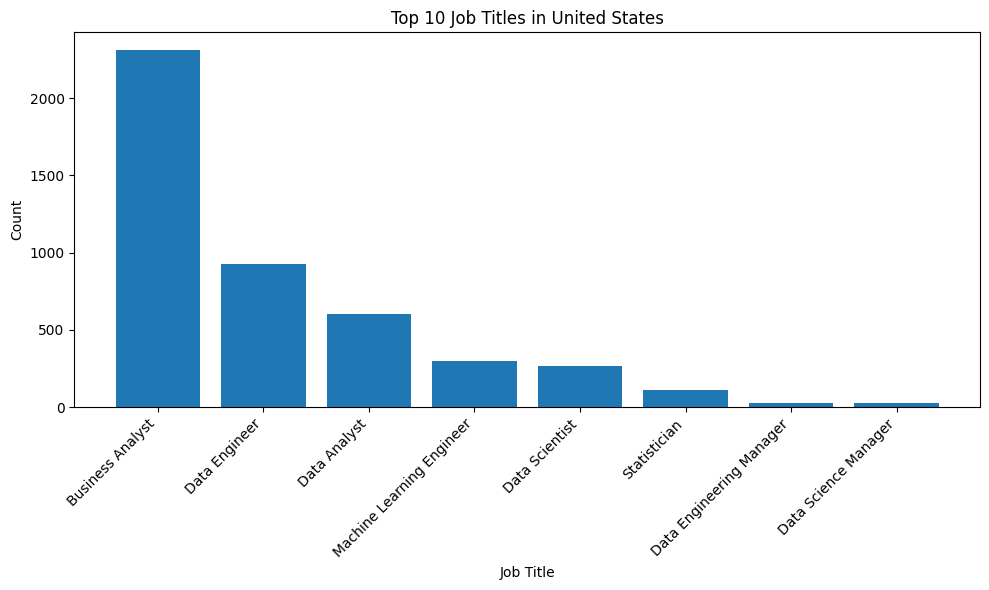

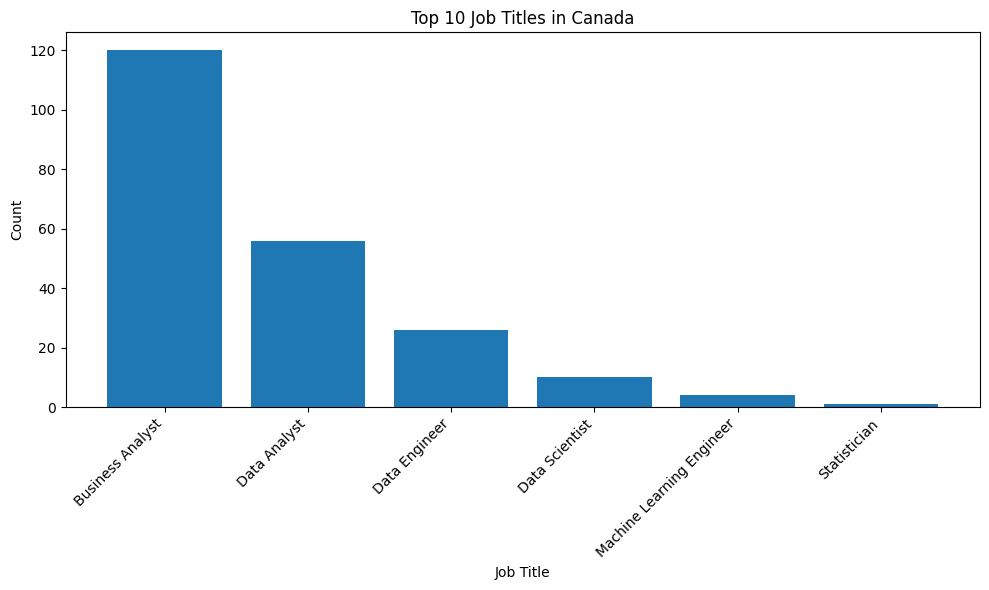

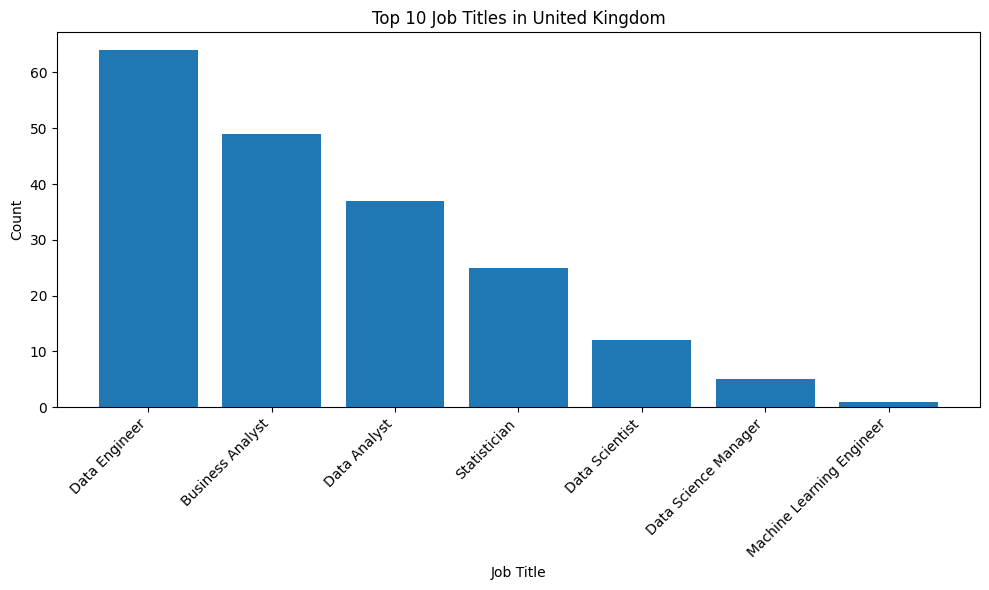

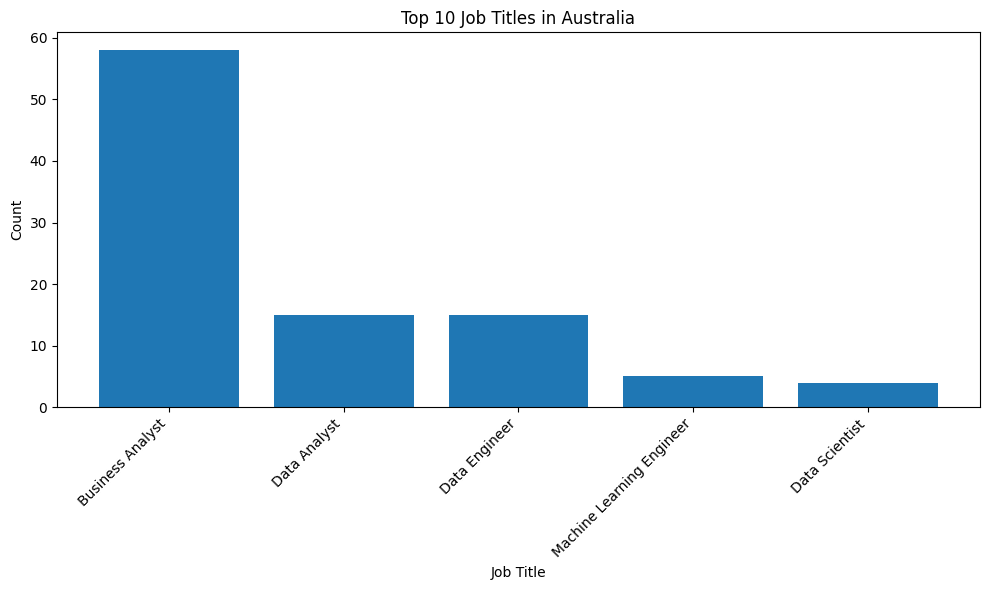

In [77]:
# Plot separate bar charts for each country
countries = Data_jobs['Country'].unique()
for country in countries:
    data_country = grouped_data_sorted[grouped_data_sorted['Country'] == country]
    plt.figure(figsize=(10, 6))
    plt.bar(data_country['Job Title'], data_country['count'])
    plt.title(f'Top 10 Job Titles in {country}')
    plt.xlabel('Job Title')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Top Industries hiring data profesional

In [78]:
Top_10_Industry = Data_jobs['Industry'].value_counts().head(10).index

filtered_data = Data_jobs[Data_jobs['Industry'].isin(Top_10_Industry)]

Job_tite_count = filtered_data.groupby(['Industry', 'Job Title']).size().reset_index(name='count')

Job_tite_count_sorted = Job_tite_count.sort_values(by='count', ascending=False)

fig = px.bar(Job_tite_count_sorted, x='Industry', y='count', color='Job Title',
             labels={'Industry': 'Industry', 'count': 'Count', 'Job Title': 'Job Title'},
             title='Top Industries Hiring data related roles',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(xaxis_tickangle=-45,
                  xaxis={'categoryorder':'total descending'})

fig.show()

#### Top Companies  hiring data profesional
|

In [79]:


Top_10_COMPANY = Data_jobs['Company'].value_counts().head(5).index

filtered_data = Data_jobs[Data_jobs['Company'].isin(Top_10_COMPANY)]

Job_tite_count = filtered_data.groupby(['Company', 'Job Title']).size().reset_index(name='count')

Job_tite_count_sorted = Job_tite_count.sort_values(by='count', ascending=False)

fig = px.bar(Job_tite_count_sorted, x='Company', y='count', color='Job Title',
             labels={'Company': 'Company', 'count': 'Count', 'Job Title': 'Job Title'},
             title='Top Companies Hiring data related roles',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(xaxis_tickangle=-45,
                  xaxis={'categoryorder':'total descending'})

fig.show()


In [80]:
df_job_postings_EDA.head()

,Last Prcoessed Time,Active Jobs,Company,Job Location,Job Release Date,Country,Job Level,Job Type,Job Link,Industry,Job Title
0,2024-01-19 09:45:09.215838+00,f,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,United States,Mid senior,Onsite,3803057508,Healthcare,Supervisor
1,2024-01-21 08:08:25.628853+00,f,Dollar General,"Tipton, IN",2024-01-14,United States,Mid senior,Onsite,3580065885,Retail,Sales Associate
2,2024-01-21 07:12:35.170823+00,f,Goodwin Recruiting,"Brookfield, WI",2024-01-14,United States,Mid senior,Onsite,3805761853,Staffing and Recruiting,Chef
3,2024-01-21 06:01:19.472942+00,f,Northrop Grumman,"Gilbert, AZ",2024-01-15,United States,Mid senior,Onsite,3795910227,Defense and Space Manufacturing,Conductor
4,2024-01-21 06:01:14.503312+00,f,"Bob Evans Restaurants, LLC","Westminster, MD",2024-01-14,United States,Associate,Onsite,3803187020,Restaurants,kitchen prep


In [81]:
df_job_postings_EDA['Country'].value_counts(normalize = True)*100

Country
United States     93.812212
United Kingdom     2.975145
Canada             2.428847
Australia          0.783797
Name: proportion, dtype: float64